In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv

In [2]:
def init(env):
    """
    env: OpenAI Gym Environment
    """
    Q = np.zeros((env.nS, env.nA))
    return Q

In [11]:
def policy(env, state, Q, epsilon):
    if np.random.rand() < epsilon: # epsilon-greedy policy
        return env.action_space.sample()
    else:
        return np.argmax(Q[state])

In [67]:
episodes = 20000
epsilon = 0.2
alpha = 0.4
discount = 0.999

env = FrozenLakeEnv()
Q = init(env)        

In [71]:
# This is a model free so learn while moving
episode_rewards = []
for e in range(episodes):
    state = env.reset()
    rewards = []
    while True:
        action = policy(env, state, Q, epsilon)
        prev_state = state
        state, reward, done, _ = env.step(action)
        rewards.append(reward)
        nextaction = policy(env, state, Q, epsilon)
        # We are following the current poliy (on-policy) for the next state too.
        Q[prev_state][action] += alpha * (reward + discount*Q[prev_state][nextaction] - Q[prev_state][action])
        if done: # Q values of the terminal state is always 0.
            Q[nextstate] = np.zeros(env.nA)
            break
    episode_rewards.append(np.mean(rewards))

[[  7.82739227e-35   7.82865613e-35   7.82537599e-35   7.82709608e-35]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.

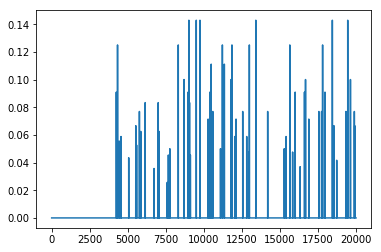

In [72]:
print(Q)
plt.plot(episode_rewards)

In [73]:
done = False
state = env.reset()
while not done:
    env.render()
    action = policy(env, state, Q, epsilon)
    nextstate, _, done, _ = env.step(action)
env.render()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
